# __Algorítmos de Máximización de Esperanzas__

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import lec6_graphs as afx
plt.rcParams['figure.figsize'] = (20,16)

In [3]:
df = pd.read_csv('diabetes.csv').drop(columns=['Unnamed: 0'])
df.sample()

,class,glucose,insulin,sspg
43,Normal,80,269,121


In [4]:
df['class'].value_counts()

Normal      76
Chemical    36
Overt       33
Name: class, dtype: int64

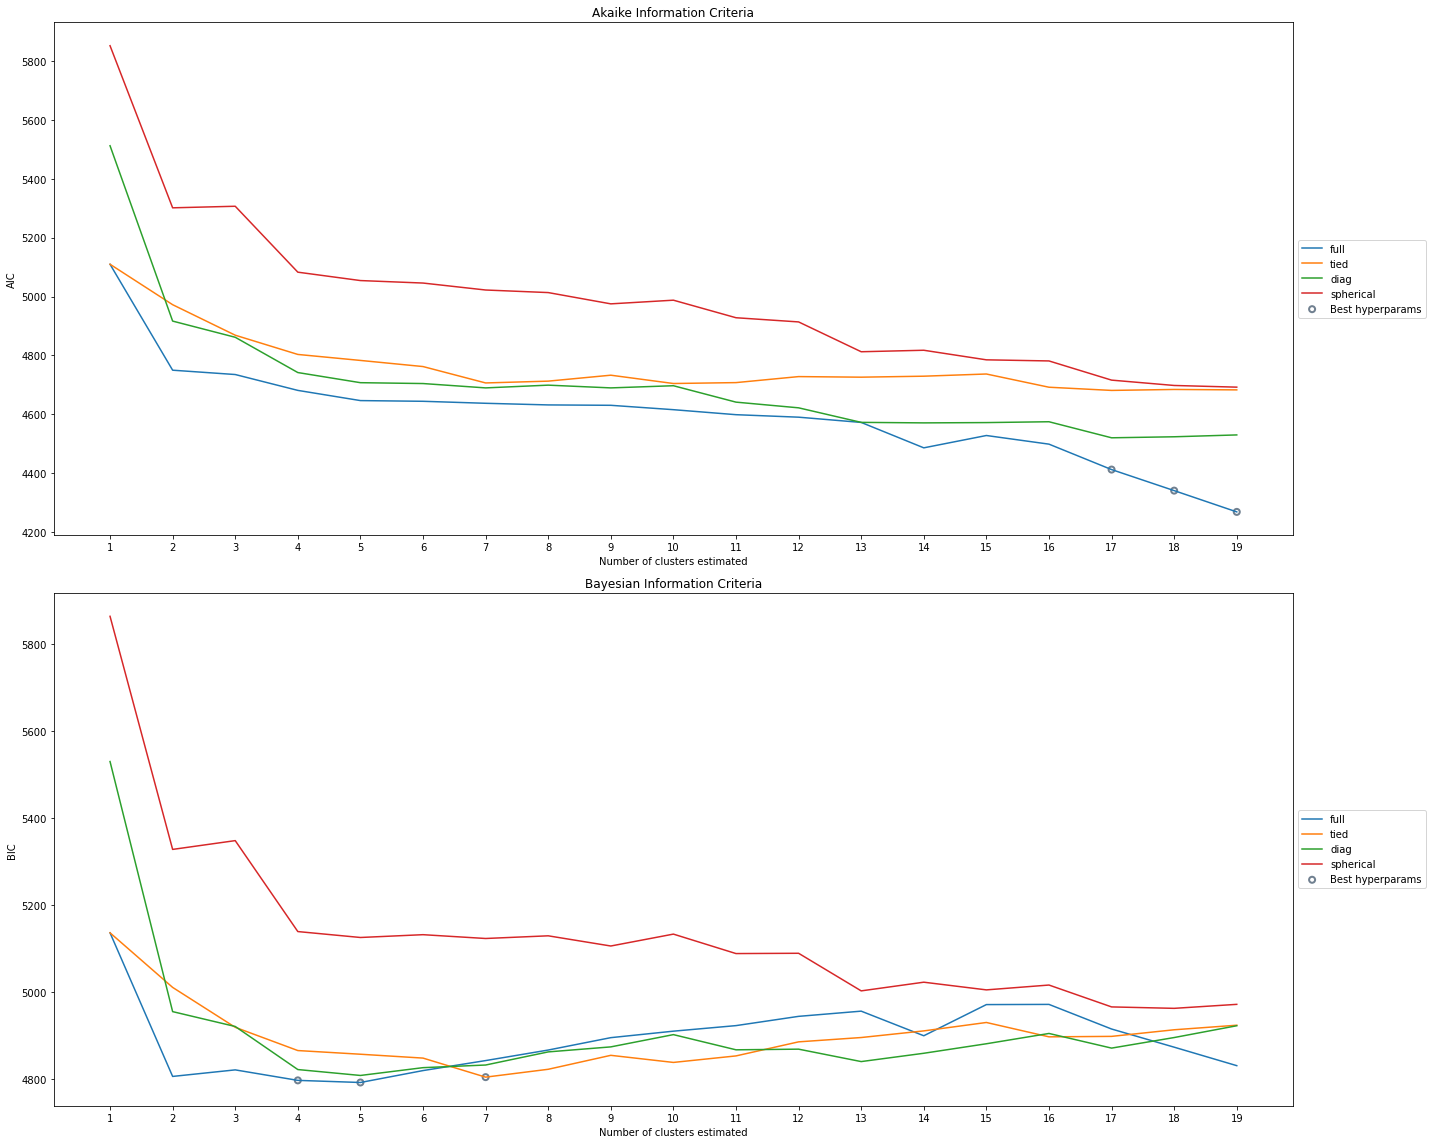

In [8]:
afx.gmm_information_criteria_report(df.loc[:, 'glucose':'sspg'], k=np.arange(1, 20))
plt.tight_layout()

In [16]:
x_mat = df.loc[:, 'glucose':'sspg']
X = StandardScaler().fit_transform(x_mat)
df['y'] = LabelEncoder().fit_transform(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, df['y'], test_size=.33, random_state=11238)

In [17]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=323).fit(X_train)
print(pd.Series(gmm.predict(X_train)).value_counts())
print(classification_report(y_train, gmm.predict(X_train)))
print(classification_report(y_test, gmm.predict(X_test)))

1    73
2    19
0     5
dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.71      1.00      0.83        52
           2       0.84      0.73      0.78        22

    accuracy                           0.70        97
   macro avg       0.52      0.58      0.54        97
weighted avg       0.57      0.70      0.62        97

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.62      0.96      0.75        24
           2       0.86      0.55      0.67        11

    accuracy                           0.60        48
   macro avg       0.49      0.50      0.47        48
weighted avg       0.51      0.60      0.53        48



In [19]:
# para cada clase
for i,n in enumerate(df['class'].unique()):
    # extraemos la densidad reportada del modelo
    print("Ponderador para clase {} {}: {}".format(i, n,gmm.weights_[i]))
    for j, k in enumerate(x_mat.columns):
        # dentro de cada clase extraemos la media de los atributos
        print("Media {}: {}".format(k, gmm.means_[i][j]))
        # y la matriz de covarianza entre éstos, condicional a la clase
        print("Covarianza {}: {}".format(k,gmm.covariances_[i][j]))
    print("\n", 50 * '=', "\n")

Ponderador para clase 0 Normal: 0.05133856305071589
Media glucose: 3.2608798453954106
Covarianza glucose: [ 0.1647273  -0.00442975 -0.03541257]
Media insulin: 2.9112785265355785
Covarianza insulin: [-0.00442975  0.05400545 -0.00257339]
Media sspg: -1.324126054243474
Covarianza sspg: [-0.03541257 -0.00257339  0.02131298]


Ponderador para clase 1 Chemical: 0.7437917772761508
Media glucose: -0.44724087441501054
Covarianza glucose: [0.02248654 0.02763452 0.04846874]
Media insulin: -0.4892299467008604
Covarianza insulin: [0.02763452 0.07772101 0.12116249]
Media sspg: 0.25190212756632374
Covarianza sspg: [0.04846874 0.12116249 1.17896617]


Ponderador para clase 2 Overt: 0.20486965967313353
Media glucose: 0.6670500303419257
Covarianza glucose: [ 0.57503735  0.49390818 -0.18134298]
Media insulin: 0.894587518942109
Covarianza insulin: [ 0.49390818  0.45992445 -0.15675175]
Media sspg: -0.5891501286942963
Covarianza sspg: [-0.18134298 -0.15675175  0.20083518]




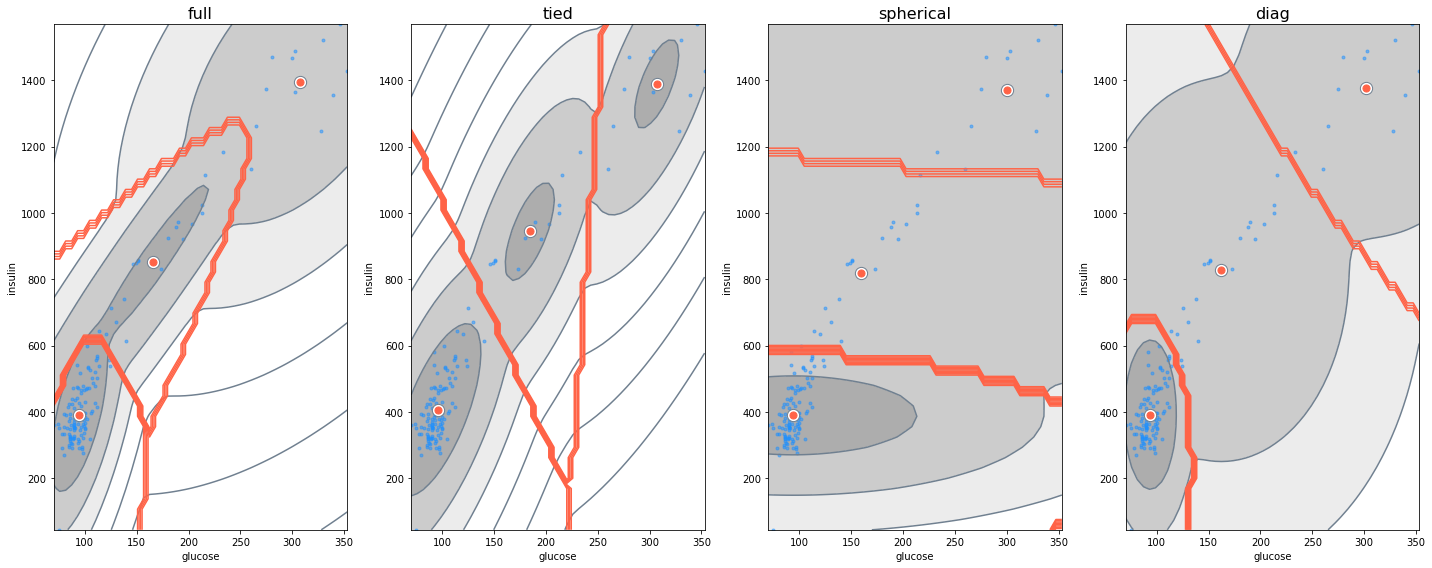

In [21]:
# Definimos la matriz de atributos
X = df.loc[:,['glucose', 'insulin']]
# definimos todas las opciones
covar_candidate = ['full', 'tied', 'spherical', 'diag']

plt.figure(figsize=(20, 8))
# para cada opción
for index, varname in enumerate(covar_candidate):
    plt.subplot(1, 4, index + 1)
    # estimamos la región de densidad con una función creada
    # los detalles se encuentran en el archivo auxiliar
    afx.plot_gaussian_ellipses(GaussianMixture(n_components=3, covariance_type=varname, random_state=323).fit(X),X=X)
    plt.tight_layout(); plt.title(varname, fontsize=16)

In [22]:
for covar in ['full', 'tied', 'spherical', 'diag']:
    tmp_gmm = GaussianMixture(n_components=3, covariance_type=covar, random_state=323).fit(X_train)
    print(covar, "\n", classification_report(y_test, tmp_gmm.predict(X_test)))


full 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.62      0.96      0.75        24
           2       0.86      0.55      0.67        11

    accuracy                           0.60        48
   macro avg       0.49      0.50      0.47        48
weighted avg       0.51      0.60      0.53        48

tied 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.59      1.00      0.74        24
           2       1.00      0.27      0.43        11

    accuracy                           0.56        48
   macro avg       0.53      0.42      0.39        48
weighted avg       0.52      0.56      0.47        48

spherical 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.59      1.00      0.74        24
           2       1.00      0.18      0.31      

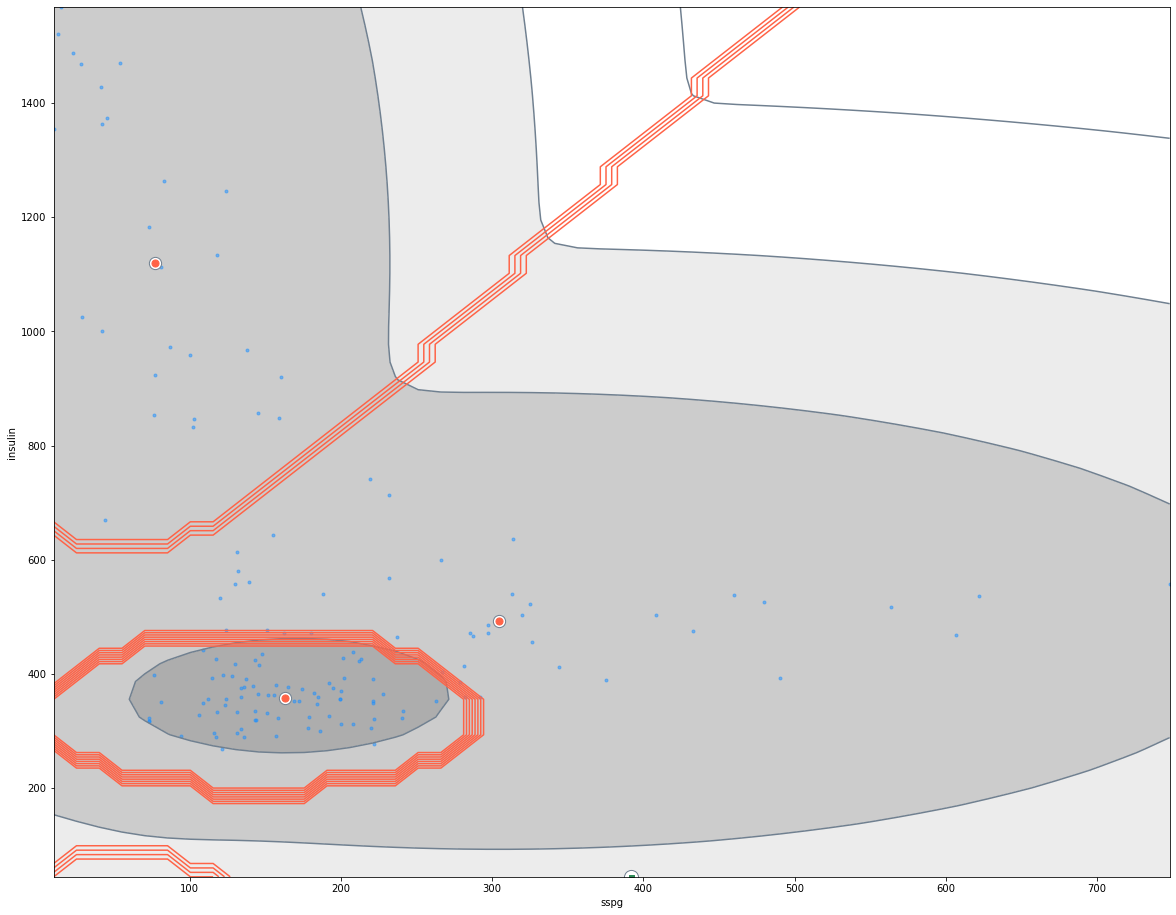

In [23]:
# Separamos la matriz
X = df.loc[:,['sspg', 'insulin']]
# Implementamos un modelo con los hiperparámetros informados anteriormente
model = GaussianMixture(n_components=3, covariance_type='diag',
random_state=323).fit(X)
# Implementamos la función
afx.plot_gaussian_ellipses(model, X=X)
X= np.array(X)
# Dado que nuestro espacio de densidades se basa en la logverosimilitud, implementamos
# la función score_samples
densities = model.score_samples(X)
# extraemos las observaciones que se sitúen en el 5% superior
thres = np.percentile(densities,.5)
# filtamos todas aquellas observaciones cuyas densidades sean menores al puntaje
anomalies = X[densities < thres]
# graficamos
plt.scatter(anomalies[:, 0], anomalies[:, 1],
edgecolor='slategrey',
facecolor='white', marker='o',s=200)
plt.scatter(anomalies[:, 0], anomalies[:, 1],
color='seagreen',
marker='s', s=25);